In [1]:
#CKVGG19-1EXP

2024-10-19 07:50:09.662551: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-19 07:50:09.970159: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-19 07:50:10.755405: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.


2024-10-19 07:50:12.462289: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-19 07:50:12.650684: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-19 07:50:12.650862: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created you can proceed to train you data with this model.


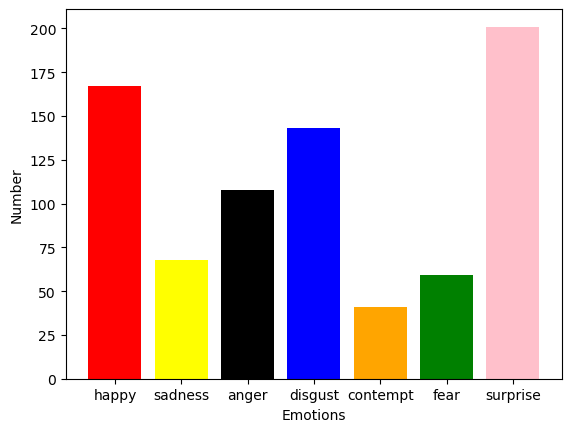

In [2]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [3]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    

Epoch 1/500


/tmp/ipykernel_4990/3806955214.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,
2024-10-19 07:50:15.796929: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-19 07:50:16.388912: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-19 07:50:16.404259: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x735e501cf780 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-19 07:50:16.404276: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-19 07:50:16.419108: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR 

12/12 [==============================] - 4s 65ms/step - loss: 1.7474 - accuracy: 0.4371 - val_loss: 3.1741 - val_accuracy: 0.3854
Epoch 2/500
12/12 [==============================] - 0s 34ms/step - loss: 0.8948 - accuracy: 0.6758 - val_loss: 1.3086 - val_accuracy: 0.6458
Epoch 3/500
12/12 [==============================] - 0s 33ms/step - loss: 0.6375 - accuracy: 0.7704 - val_loss: 1.0414 - val_accuracy: 0.6042
Epoch 4/500
12/12 [==============================] - 0s 34ms/step - loss: 0.5048 - accuracy: 0.8326 - val_loss: 0.5910 - val_accuracy: 0.7604
Epoch 5/500
12/12 [==============================] - 0s 31ms/step - loss: 0.3941 - accuracy: 0.8631 - val_loss: 0.5113 - val_accuracy: 0.8229
Epoch 6/500
12/12 [==============================] - 0s 33ms/step - loss: 0.3095 - accuracy: 0.8866 - val_loss: 0.4864 - val_accuracy: 0.8385
Epoch 7/500
12/12 [==============================] - 0s 35ms/step - loss: 0.2879 - accuracy: 0.8990 - val_loss: 0.3717 - val_accuracy: 0.8646
Epoch 8/500
12/12 

12/12 [==============================] - 1s 100ms/step - loss: 0.0193 - accuracy: 0.9931 - val_loss: 0.2699 - val_accuracy: 0.9740
Epoch 116/500
12/12 [==============================] - 2s 155ms/step - loss: 0.0213 - accuracy: 0.9931 - val_loss: 0.1586 - val_accuracy: 0.9844
Epoch 117/500
12/12 [==============================] - 2s 142ms/step - loss: 0.0180 - accuracy: 0.9945 - val_loss: 0.1477 - val_accuracy: 0.9740
Epoch 118/500
12/12 [==============================] - 2s 137ms/step - loss: 0.0278 - accuracy: 0.9903 - val_loss: 0.1763 - val_accuracy: 0.9792
Epoch 119/500
12/12 [==============================] - 1s 112ms/step - loss: 0.0240 - accuracy: 0.9917 - val_loss: 0.1304 - val_accuracy: 0.9792
Epoch 120/500
12/12 [==============================] - 1s 116ms/step - loss: 0.0275 - accuracy: 0.9945 - val_loss: 0.1372 - val_accuracy: 0.9740
Epoch 121/500
12/12 [==============================] - 2s 149ms/step - loss: 0.0484 - accuracy: 0.9834 - val_loss: 0.0980 - val_accuracy: 0.9792

Epoch 172/500
12/12 [==============================] - 2s 177ms/step - loss: 0.0147 - accuracy: 0.9931 - val_loss: 0.2172 - val_accuracy: 0.9740
Epoch 173/500
12/12 [==============================] - 2s 166ms/step - loss: 0.0085 - accuracy: 0.9959 - val_loss: 0.2504 - val_accuracy: 0.9740
Epoch 174/500
12/12 [==============================] - 2s 167ms/step - loss: 0.0134 - accuracy: 0.9945 - val_loss: 0.2022 - val_accuracy: 0.9740
Epoch 175/500
12/12 [==============================] - 2s 162ms/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 0.1891 - val_accuracy: 0.9792
Epoch 176/500
12/12 [==============================] - 2s 174ms/step - loss: 0.0104 - accuracy: 0.9959 - val_loss: 0.1791 - val_accuracy: 0.9792
Epoch 177/500
12/12 [==============================] - 2s 154ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.2438 - val_accuracy: 0.9583
Epoch 178/500
12/12 [==============================] - 2s 154ms/step - loss: 0.0298 - accuracy: 0.9917 - val_loss: 0.2218 - val_ac

Epoch 229/500
12/12 [==============================] - 2s 128ms/step - loss: 0.0179 - accuracy: 0.9959 - val_loss: 0.2629 - val_accuracy: 0.9740
Epoch 230/500
12/12 [==============================] - 2s 129ms/step - loss: 0.0149 - accuracy: 0.9972 - val_loss: 0.2360 - val_accuracy: 0.9740
Epoch 231/500
12/12 [==============================] - 1s 99ms/step - loss: 0.0208 - accuracy: 0.9931 - val_loss: 0.2274 - val_accuracy: 0.9792
Epoch 232/500
12/12 [==============================] - 1s 79ms/step - loss: 0.0149 - accuracy: 0.9945 - val_loss: 0.2206 - val_accuracy: 0.9792
Epoch 233/500
12/12 [==============================] - 1s 66ms/step - loss: 0.0210 - accuracy: 0.9903 - val_loss: 0.2700 - val_accuracy: 0.9531
Epoch 234/500
12/12 [==============================] - 1s 59ms/step - loss: 0.0266 - accuracy: 0.9917 - val_loss: 0.2762 - val_accuracy: 0.9583
Epoch 235/500
12/12 [==============================] - 1s 53ms/step - loss: 0.0593 - accuracy: 0.9834 - val_loss: 0.2951 - val_accurac

Epoch 286/500
12/12 [==============================] - 1s 45ms/step - loss: 0.0026 - accuracy: 0.9986 - val_loss: 0.2187 - val_accuracy: 0.9792
Epoch 287/500
12/12 [==============================] - 1s 116ms/step - loss: 0.0130 - accuracy: 0.9931 - val_loss: 0.2934 - val_accuracy: 0.9792
Epoch 288/500
12/12 [==============================] - 2s 136ms/step - loss: 0.0067 - accuracy: 0.9986 - val_loss: 0.3158 - val_accuracy: 0.9792
Epoch 289/500
12/12 [==============================] - 2s 133ms/step - loss: 0.0055 - accuracy: 0.9986 - val_loss: 0.3026 - val_accuracy: 0.9792
Epoch 290/500
12/12 [==============================] - 1s 100ms/step - loss: 0.0072 - accuracy: 0.9972 - val_loss: 0.2827 - val_accuracy: 0.9740
Epoch 291/500
12/12 [==============================] - 1s 79ms/step - loss: 0.0253 - accuracy: 0.9931 - val_loss: 0.3527 - val_accuracy: 0.9479
Epoch 292/500
12/12 [==============================] - 1s 68ms/step - loss: 0.0354 - accuracy: 0.9903 - val_loss: 0.2940 - val_accur

Epoch 343/500
12/12 [==============================] - 1s 42ms/step - loss: 0.0088 - accuracy: 0.9972 - val_loss: 0.1535 - val_accuracy: 0.9688
Epoch 344/500
12/12 [==============================] - 1s 45ms/step - loss: 0.0113 - accuracy: 0.9945 - val_loss: 0.1594 - val_accuracy: 0.9583
Epoch 345/500
12/12 [==============================] - 2s 130ms/step - loss: 0.0169 - accuracy: 0.9945 - val_loss: 0.1679 - val_accuracy: 0.9792
Epoch 346/500
12/12 [==============================] - 2s 129ms/step - loss: 0.0031 - accuracy: 1.0000 - val_loss: 0.2053 - val_accuracy: 0.9792
Epoch 347/500
12/12 [==============================] - 2s 136ms/step - loss: 0.0283 - accuracy: 0.9931 - val_loss: 0.1945 - val_accuracy: 0.9740
Epoch 348/500
12/12 [==============================] - 1s 103ms/step - loss: 0.0049 - accuracy: 1.0000 - val_loss: 0.1602 - val_accuracy: 0.9844
Epoch 349/500
12/12 [==============================] - 1s 79ms/step - loss: 0.0090 - accuracy: 0.9945 - val_loss: 0.1866 - val_accur

Epoch 400/500
12/12 [==============================] - 2s 128ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.2636 - val_accuracy: 0.9792
Epoch 401/500
12/12 [==============================] - 1s 97ms/step - loss: 0.0137 - accuracy: 0.9945 - val_loss: 0.2576 - val_accuracy: 0.9792
Epoch 402/500
12/12 [==============================] - 1s 78ms/step - loss: 0.0226 - accuracy: 0.9931 - val_loss: 0.3310 - val_accuracy: 0.9531
Epoch 403/500
12/12 [==============================] - 1s 67ms/step - loss: 0.0083 - accuracy: 0.9974 - val_loss: 0.2890 - val_accuracy: 0.9583
Epoch 404/500
12/12 [==============================] - 1s 57ms/step - loss: 0.0135 - accuracy: 0.9945 - val_loss: 0.2618 - val_accuracy: 0.9740
Epoch 405/500
12/12 [==============================] - 1s 55ms/step - loss: 0.0241 - accuracy: 0.9959 - val_loss: 0.2861 - val_accuracy: 0.9688
Epoch 406/500
12/12 [==============================] - 1s 51ms/step - loss: 0.0228 - accuracy: 0.9903 - val_loss: 0.3079 - val_accuracy

Epoch 457/500
12/12 [==============================] - 1s 54ms/step - loss: 0.0079 - accuracy: 0.9974 - val_loss: 0.1978 - val_accuracy: 0.9792
Epoch 458/500
12/12 [==============================] - 1s 68ms/step - loss: 0.0024 - accuracy: 1.0000 - val_loss: 0.1895 - val_accuracy: 0.9792
Epoch 459/500
12/12 [==============================] - 1s 59ms/step - loss: 0.0064 - accuracy: 0.9987 - val_loss: 0.2089 - val_accuracy: 0.9792
Epoch 460/500
12/12 [==============================] - 1s 56ms/step - loss: 0.0124 - accuracy: 0.9961 - val_loss: 0.2597 - val_accuracy: 0.9740
Epoch 461/500
12/12 [==============================] - 1s 49ms/step - loss: 0.0090 - accuracy: 0.9959 - val_loss: 0.2489 - val_accuracy: 0.9688
Epoch 462/500
12/12 [==============================] - 1s 46ms/step - loss: 0.0105 - accuracy: 0.9972 - val_loss: 0.2427 - val_accuracy: 0.9740
Epoch 463/500
12/12 [==============================] - 1s 51ms/step - loss: 0.0194 - accuracy: 0.9931 - val_loss: 0.2563 - val_accuracy:

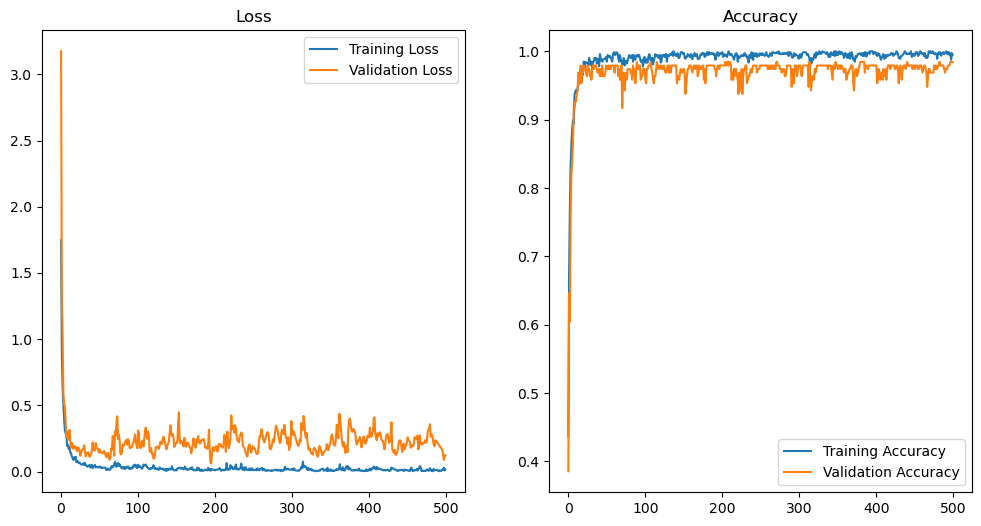

In [4]:

    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [5]:
#ckresnet--1exp

Found 787 images belonging to 7 classes.
Found 194 images belonging to 7 classes.
Train and Validation sets have been created.
Above data generator functions have been created.
Above data generator functions have been created.
CNN model has been created you can proceed to train you data with this model.


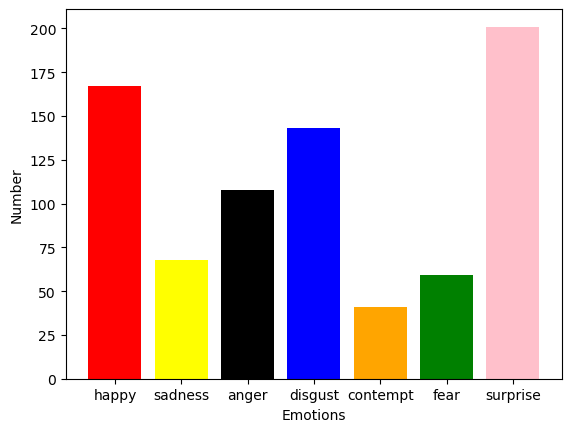

In [6]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
import os
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import plot_model
from keras import regularizers
from tensorflow.keras.utils import plot_model
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "contempt", "fear", "surprise"]

folder_path = "CK+48/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')
plt.savefig('hostgoarm.png')
#plt.show()


batch_size  = 64
datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_ds = datagen_train.flow_from_directory("CK+48/train",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=True)


test_ds = datagen_val.flow_from_directory("CK+48/validation",
                                               target_size = (48,48),
                                               color_mode = "rgb",
                                               batch_size=batch_size,
                                               class_mode='categorical',
                                               shuffle=False)
print('Train and Validation sets have been created.')





# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')
# Rescale train data.
datagen_train = ImageDataGenerator(rescale = 1./255,
                                  )

# Rescale validation data.
datagen_val = ImageDataGenerator(rescale = 1./255,
                                 )

print('Above data generator functions have been created.')





#model resnet152

from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

#model.summary()






# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [7]:

epochs = 500

history = model.fit_generator(generator=train_ds,
                                steps_per_epoch=train_ds.n//train_ds.batch_size,
                                epochs=epochs,
                                validation_data = test_ds,
                                validation_steps = test_ds.n//test_ds.batch_size,
                                
                                )
print('Your model has been trained!!')
     
    
    
    
    
    


Epoch 1/500


/tmp/ipykernel_4990/1281752000.py:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator=train_ds,


12/12 [==============================] - 12s 303ms/step - loss: 1.4919 - accuracy: 0.5076 - val_loss: 4.0505 - val_accuracy: 0.4948
Epoch 2/500
12/12 [==============================] - 0s 37ms/step - loss: 0.8194 - accuracy: 0.7068 - val_loss: 1.9503 - val_accuracy: 0.5938
Epoch 3/500
12/12 [==============================] - 0s 40ms/step - loss: 0.5456 - accuracy: 0.7995 - val_loss: 1.7235 - val_accuracy: 0.5885
Epoch 4/500
12/12 [==============================] - 1s 44ms/step - loss: 0.3538 - accuracy: 0.8714 - val_loss: 0.9514 - val_accuracy: 0.7240
Epoch 5/500
12/12 [==============================] - 1s 49ms/step - loss: 0.2822 - accuracy: 0.9059 - val_loss: 0.8606 - val_accuracy: 0.7240
Epoch 6/500
12/12 [==============================] - 1s 53ms/step - loss: 0.2319 - accuracy: 0.9281 - val_loss: 0.8222 - val_accuracy: 0.7604
Epoch 7/500
12/12 [==============================] - 1s 58ms/step - loss: 0.1751 - accuracy: 0.9474 - val_loss: 0.4967 - val_accuracy: 0.8333
Epoch 8/500
12/1

12/12 [==============================] - 1s 60ms/step - loss: 0.0239 - accuracy: 0.9945 - val_loss: 0.2854 - val_accuracy: 0.9688
Epoch 116/500
12/12 [==============================] - 1s 53ms/step - loss: 0.0310 - accuracy: 0.9931 - val_loss: 0.7541 - val_accuracy: 0.8594
Epoch 117/500
12/12 [==============================] - 1s 53ms/step - loss: 0.0871 - accuracy: 0.9793 - val_loss: 0.5406 - val_accuracy: 0.9115
Epoch 118/500
12/12 [==============================] - 1s 52ms/step - loss: 0.0602 - accuracy: 0.9806 - val_loss: 0.4402 - val_accuracy: 0.9167
Epoch 119/500
12/12 [==============================] - 1s 51ms/step - loss: 0.0516 - accuracy: 0.9806 - val_loss: 0.2693 - val_accuracy: 0.9583
Epoch 120/500
12/12 [==============================] - 1s 50ms/step - loss: 0.0131 - accuracy: 0.9974 - val_loss: 0.3797 - val_accuracy: 0.9271
Epoch 121/500
12/12 [==============================] - 1s 50ms/step - loss: 0.0225 - accuracy: 0.9931 - val_loss: 0.3963 - val_accuracy: 0.9323
Epoch 

Epoch 172/500
12/12 [==============================] - 1s 53ms/step - loss: 0.0075 - accuracy: 0.9972 - val_loss: 0.4943 - val_accuracy: 0.9010
Epoch 173/500
12/12 [==============================] - 1s 57ms/step - loss: 0.0168 - accuracy: 0.9931 - val_loss: 0.3421 - val_accuracy: 0.9479
Epoch 174/500
12/12 [==============================] - 1s 56ms/step - loss: 0.0071 - accuracy: 0.9959 - val_loss: 0.3463 - val_accuracy: 0.9583
Epoch 175/500
12/12 [==============================] - 1s 53ms/step - loss: 0.0034 - accuracy: 0.9986 - val_loss: 0.3154 - val_accuracy: 0.9688
Epoch 176/500
12/12 [==============================] - 1s 70ms/step - loss: 0.0061 - accuracy: 0.9986 - val_loss: 0.2657 - val_accuracy: 0.9688
Epoch 177/500
12/12 [==============================] - 1s 62ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 0.3111 - val_accuracy: 0.9740
Epoch 178/500
12/12 [==============================] - 1s 56ms/step - loss: 0.0066 - accuracy: 0.9959 - val_loss: 0.2533 - val_accuracy:

Epoch 285/500
12/12 [==============================] - 0s 31ms/step - loss: 7.9168e-04 - accuracy: 1.0000 - val_loss: 0.2906 - val_accuracy: 0.9844
Epoch 286/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0302 - accuracy: 0.9931 - val_loss: 0.3691 - val_accuracy: 0.9271
Epoch 287/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0379 - accuracy: 0.9876 - val_loss: 0.3030 - val_accuracy: 0.9531
Epoch 288/500
12/12 [==============================] - 0s 32ms/step - loss: 0.0136 - accuracy: 0.9945 - val_loss: 0.2528 - val_accuracy: 0.9635
Epoch 289/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0162 - accuracy: 0.9945 - val_loss: 0.3038 - val_accuracy: 0.9688
Epoch 290/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0357 - accuracy: 0.9889 - val_loss: 0.4207 - val_accuracy: 0.9271
Epoch 291/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0426 - accuracy: 0.9903 - val_loss: 0.2414 - val_accur

Epoch 398/500
12/12 [==============================] - 0s 30ms/step - loss: 2.5513e-04 - accuracy: 1.0000 - val_loss: 0.2819 - val_accuracy: 0.9792
Epoch 399/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0169 - accuracy: 0.9959 - val_loss: 0.2965 - val_accuracy: 0.9688
Epoch 400/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 0.2359 - val_accuracy: 0.9844
Epoch 401/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0090 - accuracy: 0.9972 - val_loss: 0.5394 - val_accuracy: 0.9271
Epoch 402/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0203 - accuracy: 0.9931 - val_loss: 0.4725 - val_accuracy: 0.9219
Epoch 403/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0177 - accuracy: 0.9917 - val_loss: 0.1538 - val_accuracy: 0.9531
Epoch 404/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0195 - accuracy: 0.9959 - val_loss: 0.6755 - val_accur

Epoch 455/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0180 - accuracy: 0.9959 - val_loss: 0.4087 - val_accuracy: 0.9844
Epoch 456/500
12/12 [==============================] - 0s 29ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.3660 - val_accuracy: 0.9792
Epoch 457/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0106 - accuracy: 0.9972 - val_loss: 0.3697 - val_accuracy: 0.9844
Epoch 458/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0078 - accuracy: 0.9974 - val_loss: 0.3499 - val_accuracy: 0.9844
Epoch 459/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0046 - accuracy: 0.9987 - val_loss: 0.3029 - val_accuracy: 0.9844
Epoch 460/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0030 - accuracy: 0.9986 - val_loss: 0.3392 - val_accuracy: 0.9688
Epoch 461/500
12/12 [==============================] - 0s 30ms/step - loss: 0.0073 - accuracy: 0.9974 - val_loss: 0.2126 - val_accuracy:

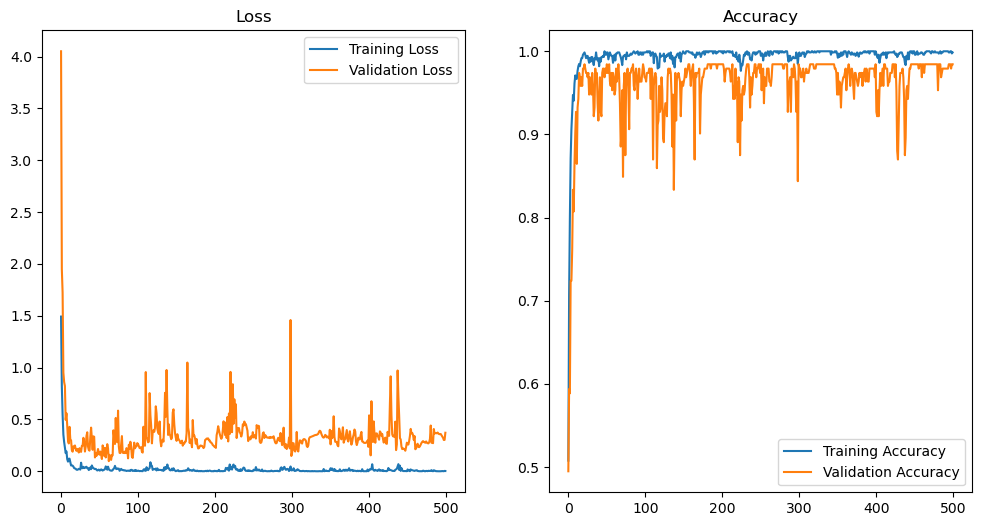

In [8]:
    # Plotting training history
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()


In [9]:
#JAFFEVGG19---1EXP

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.


/home/rajesh/anaconda3/lib/python3.11/site-packages/keras/src/preprocessing/image.py:202: UserWarning: Using ".tiff" files with multiple bands will cause distortion. Please verify your output.
  warnings.warn(


Train and Validation sets have been created.
CNN model has been created you can proceed to train you data with this model.


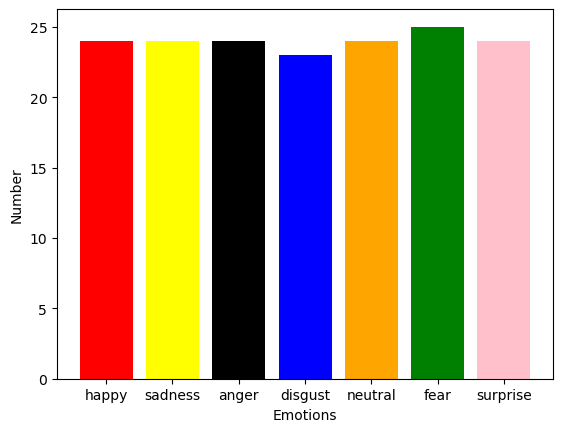

In [10]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


#model vgg19

from keras.applications.vgg19 import VGG19
conv_base = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

#conv_base.summary()

model = Sequential()
model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')



In [11]:



# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)



Epoch 1/500


2024-10-19 08:04:41.411884: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.37GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-19 08:04:41.433139: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 1.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-19 08:04:41.541410: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.02GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-19 08:04:41.541449: W tensorflow/tsl/framework/bfc_allocator.cc:296] Allocator (GPU

3/3 [==============================] - 15s 4s/step - loss: 2.7317 - accuracy: 0.1905 - val_loss: 3.5114 - val_accuracy: 0.1556
Epoch 2/500
3/3 [==============================] - 2s 453ms/step - loss: 2.1283 - accuracy: 0.3452 - val_loss: 4.3992 - val_accuracy: 0.1556
Epoch 3/500
3/3 [==============================] - 2s 489ms/step - loss: 2.0094 - accuracy: 0.3512 - val_loss: 4.6002 - val_accuracy: 0.2222
Epoch 4/500
3/3 [==============================] - 2s 458ms/step - loss: 1.9239 - accuracy: 0.4048 - val_loss: 4.6170 - val_accuracy: 0.3111
Epoch 5/500
3/3 [==============================] - 2s 450ms/step - loss: 1.9463 - accuracy: 0.3393 - val_loss: 5.5282 - val_accuracy: 0.2889
Epoch 6/500
3/3 [==============================] - 2s 488ms/step - loss: 1.9260 - accuracy: 0.3690 - val_loss: 6.7559 - val_accuracy: 0.2000
Epoch 7/500
3/3 [==============================] - 2s 451ms/step - loss: 1.6533 - accuracy: 0.4524 - val_loss: 7.9021 - val_accuracy: 0.1778
Epoch 8/500
3/3 [==========

Epoch 59/500
3/3 [==============================] - 2s 470ms/step - loss: 0.2935 - accuracy: 0.8690 - val_loss: 2.2002 - val_accuracy: 0.4222
Epoch 60/500
3/3 [==============================] - 2s 454ms/step - loss: 0.3825 - accuracy: 0.8512 - val_loss: 2.2783 - val_accuracy: 0.4444
Epoch 61/500
3/3 [==============================] - 2s 451ms/step - loss: 0.2514 - accuracy: 0.8988 - val_loss: 2.2155 - val_accuracy: 0.4667
Epoch 62/500
3/3 [==============================] - 2s 450ms/step - loss: 0.3260 - accuracy: 0.8750 - val_loss: 2.0595 - val_accuracy: 0.5111
Epoch 63/500
3/3 [==============================] - 2s 611ms/step - loss: 0.2667 - accuracy: 0.9167 - val_loss: 1.9114 - val_accuracy: 0.6444
Epoch 64/500
3/3 [==============================] - 2s 601ms/step - loss: 0.3134 - accuracy: 0.8750 - val_loss: 1.8544 - val_accuracy: 0.6000
Epoch 65/500
3/3 [==============================] - 2s 452ms/step - loss: 0.3493 - accuracy: 0.8690 - val_loss: 1.8358 - val_accuracy: 0.6222
Epoch 

3/3 [==============================] - 2s 480ms/step - loss: 0.1447 - accuracy: 0.9464 - val_loss: 0.8829 - val_accuracy: 0.8667
Epoch 174/500
3/3 [==============================] - 2s 598ms/step - loss: 0.2154 - accuracy: 0.9405 - val_loss: 0.9223 - val_accuracy: 0.8889
Epoch 175/500
3/3 [==============================] - 2s 473ms/step - loss: 0.1824 - accuracy: 0.9464 - val_loss: 0.9971 - val_accuracy: 0.8667
Epoch 176/500
3/3 [==============================] - 2s 483ms/step - loss: 0.1620 - accuracy: 0.9345 - val_loss: 0.9700 - val_accuracy: 0.8667
Epoch 177/500
3/3 [==============================] - 2s 475ms/step - loss: 0.1331 - accuracy: 0.9405 - val_loss: 0.9532 - val_accuracy: 0.8889
Epoch 178/500
3/3 [==============================] - 2s 448ms/step - loss: 0.0807 - accuracy: 0.9702 - val_loss: 0.9573 - val_accuracy: 0.8889
Epoch 179/500
3/3 [==============================] - 2s 475ms/step - loss: 0.1580 - accuracy: 0.9464 - val_loss: 0.9714 - val_accuracy: 0.9111
Epoch 180/500

3/3 [==============================] - 2s 454ms/step - loss: 0.0605 - accuracy: 0.9702 - val_loss: 1.2065 - val_accuracy: 0.8667
Epoch 288/500
3/3 [==============================] - 2s 478ms/step - loss: 0.1608 - accuracy: 0.9464 - val_loss: 1.3767 - val_accuracy: 0.8444
Epoch 289/500
3/3 [==============================] - 2s 469ms/step - loss: 0.1164 - accuracy: 0.9464 - val_loss: 1.4831 - val_accuracy: 0.8444
Epoch 290/500
3/3 [==============================] - 2s 478ms/step - loss: 0.1231 - accuracy: 0.9524 - val_loss: 1.5459 - val_accuracy: 0.8444
Epoch 291/500
3/3 [==============================] - 2s 450ms/step - loss: 0.1321 - accuracy: 0.9702 - val_loss: 1.5167 - val_accuracy: 0.8222
Epoch 292/500
3/3 [==============================] - 2s 592ms/step - loss: 0.0956 - accuracy: 0.9702 - val_loss: 1.4439 - val_accuracy: 0.8222
Epoch 293/500
3/3 [==============================] - 2s 448ms/step - loss: 0.0851 - accuracy: 0.9643 - val_loss: 1.4269 - val_accuracy: 0.8444
Epoch 294/500

3/3 [==============================] - 2s 454ms/step - loss: 0.0675 - accuracy: 0.9821 - val_loss: 0.9899 - val_accuracy: 0.8889
Epoch 402/500
3/3 [==============================] - 2s 479ms/step - loss: 0.0931 - accuracy: 0.9702 - val_loss: 0.9197 - val_accuracy: 0.8889
Epoch 403/500
3/3 [==============================] - 2s 474ms/step - loss: 0.0665 - accuracy: 0.9702 - val_loss: 0.8883 - val_accuracy: 0.9111
Epoch 404/500
3/3 [==============================] - 2s 482ms/step - loss: 0.0534 - accuracy: 0.9762 - val_loss: 0.8503 - val_accuracy: 0.8889
Epoch 405/500
3/3 [==============================] - 2s 471ms/step - loss: 0.0329 - accuracy: 0.9881 - val_loss: 0.8322 - val_accuracy: 0.8889
Epoch 406/500
3/3 [==============================] - 2s 452ms/step - loss: 0.0972 - accuracy: 0.9762 - val_loss: 0.8180 - val_accuracy: 0.8667
Epoch 407/500
3/3 [==============================] - 2s 598ms/step - loss: 0.1179 - accuracy: 0.9464 - val_loss: 0.8515 - val_accuracy: 0.8667
Epoch 408/500

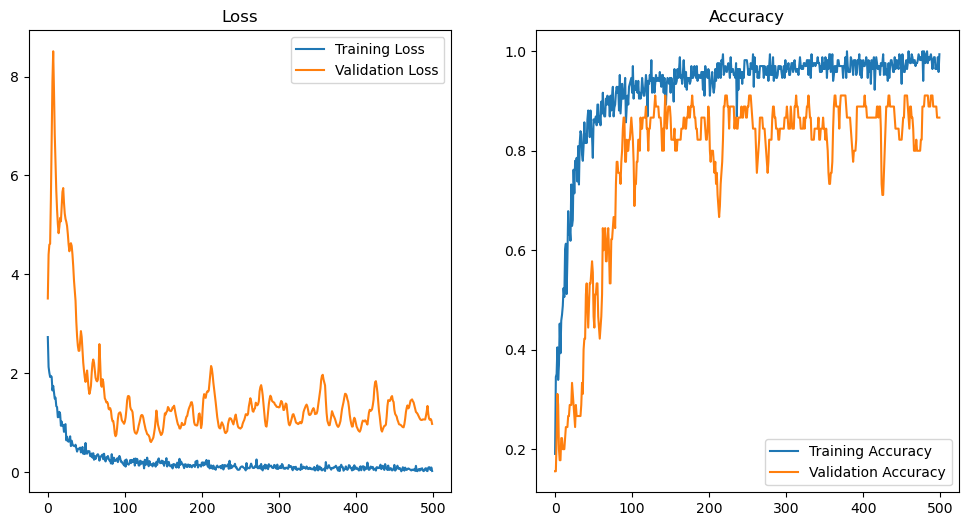

In [12]:
# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [13]:
#JAFFE RESENET----EXP2

Found 168 images belonging to 7 classes.
Found 45 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created you can proceed to train you data with this model.


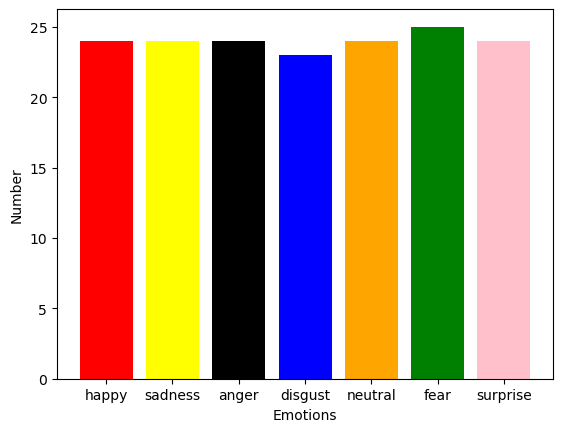

In [14]:
import tensorflow
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import tensorflow as tf
# Importing Deep Learning Libraries
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.preprocessing import image

#HISTOGRAM CODE
#histogram code
import matplotlib.pyplot as plt
import os

emotions = ["happy", "sadness", "anger", "disgust", "neutral", "fear", "surprise"]

folder_path = "Jaffetrainvalidation/train"
# Counting the number of images per emotion
counts = [len(os.listdir(os.path.join(folder_path, emotion))) for emotion in emotions]

# Plotting the bar chart
colors = ['red', 'yellow', 'black', 'blue', 'orange', 'green', 'pink']
plt.bar(emotions, height=counts, color=colors)
plt.ylabel('Number')
plt.xlabel('Emotions')


#plt.savefig('hostgoarm.png')
#plt.show()


# Data generators
batch_size = 64

# Data augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)



train_ds = datagen_train.flow_from_directory("Jaffetrainvalidation/train",
                                             target_size=(256, 256),
                                             color_mode="rgb",
                                             batch_size=batch_size,
                                             class_mode='categorical',
                                             shuffle=True)

test_ds = datagen_val.flow_from_directory("Jaffetrainvalidation/validation",
                                         target_size=(256, 256),
                                         color_mode="rgb",
                                         batch_size=batch_size,
                                         class_mode='categorical',
                                         shuffle=False)
print('Train and Validation sets have been created.')


from keras.applications.resnet import ResNet152
conv_base = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(256,256,3)
)


#conv_base.summary()


model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512,activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))

model.add(Dense(7, activation='softmax'))

# model.summary()
# Visualize the model.
#plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

conv_base.trainable = False

model.compile(optimizer = Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

print('CNN model has been created you can proceed to train you data with this model.')





In [15]:

# Training the model
epochs = 500

history = model.fit(x=train_ds,
                    epochs=epochs,
                    validation_data=test_ds)

# Print training history
print(history.history)


Epoch 1/500
3/3 [==============================] - 13s 2s/step - loss: 2.9101 - accuracy: 0.1607 - val_loss: 7.4902 - val_accuracy: 0.1778
Epoch 2/500
3/3 [==============================] - 2s 506ms/step - loss: 2.6913 - accuracy: 0.1250 - val_loss: 17.7146 - val_accuracy: 0.1556
Epoch 3/500
3/3 [==============================] - 2s 493ms/step - loss: 2.5185 - accuracy: 0.2381 - val_loss: 23.2947 - val_accuracy: 0.1556
Epoch 4/500
3/3 [==============================] - 2s 678ms/step - loss: 2.1613 - accuracy: 0.2143 - val_loss: 21.1443 - val_accuracy: 0.1556
Epoch 5/500
3/3 [==============================] - 2s 480ms/step - loss: 2.3344 - accuracy: 0.2262 - val_loss: 17.9022 - val_accuracy: 0.1333
Epoch 6/500
3/3 [==============================] - 2s 506ms/step - loss: 2.3682 - accuracy: 0.1964 - val_loss: 17.3995 - val_accuracy: 0.1333
Epoch 7/500
3/3 [==============================] - 2s 490ms/step - loss: 2.2827 - accuracy: 0.2619 - val_loss: 20.9633 - val_accuracy: 0.1556
Epoch 8/5

Epoch 116/500
3/3 [==============================] - 2s 650ms/step - loss: 0.9531 - accuracy: 0.6488 - val_loss: 6.1923 - val_accuracy: 0.1778
Epoch 117/500
3/3 [==============================] - 2s 503ms/step - loss: 0.9467 - accuracy: 0.6607 - val_loss: 6.8201 - val_accuracy: 0.1778
Epoch 118/500
3/3 [==============================] - 2s 505ms/step - loss: 0.7629 - accuracy: 0.6905 - val_loss: 5.9872 - val_accuracy: 0.1778
Epoch 119/500
3/3 [==============================] - 2s 486ms/step - loss: 0.9622 - accuracy: 0.6488 - val_loss: 3.9426 - val_accuracy: 0.1778
Epoch 120/500
3/3 [==============================] - 2s 651ms/step - loss: 0.8380 - accuracy: 0.6964 - val_loss: 2.7522 - val_accuracy: 0.2889
Epoch 121/500
3/3 [==============================] - 2s 490ms/step - loss: 0.7864 - accuracy: 0.7381 - val_loss: 3.4007 - val_accuracy: 0.2667
Epoch 122/500
3/3 [==============================] - 2s 505ms/step - loss: 0.9054 - accuracy: 0.6250 - val_loss: 5.2644 - val_accuracy: 0.1333

3/3 [==============================] - 2s 486ms/step - loss: 0.6509 - accuracy: 0.7738 - val_loss: 4.3319 - val_accuracy: 0.2444
Epoch 231/500
3/3 [==============================] - 2s 488ms/step - loss: 0.6754 - accuracy: 0.7500 - val_loss: 5.1351 - val_accuracy: 0.2000
Epoch 232/500
3/3 [==============================] - 2s 490ms/step - loss: 0.6332 - accuracy: 0.7857 - val_loss: 4.8279 - val_accuracy: 0.2444
Epoch 233/500
3/3 [==============================] - 2s 656ms/step - loss: 0.7561 - accuracy: 0.7024 - val_loss: 3.4245 - val_accuracy: 0.3333
Epoch 234/500
3/3 [==============================] - 2s 485ms/step - loss: 0.5796 - accuracy: 0.8036 - val_loss: 2.8774 - val_accuracy: 0.3556
Epoch 235/500
3/3 [==============================] - 2s 484ms/step - loss: 0.6328 - accuracy: 0.7500 - val_loss: 2.1923 - val_accuracy: 0.3556
Epoch 236/500
3/3 [==============================] - 2s 527ms/step - loss: 0.7071 - accuracy: 0.7262 - val_loss: 1.8162 - val_accuracy: 0.5111
Epoch 237/500

3/3 [==============================] - 2s 487ms/step - loss: 0.5253 - accuracy: 0.7976 - val_loss: 3.9700 - val_accuracy: 0.3333
Epoch 345/500
3/3 [==============================] - 2s 658ms/step - loss: 0.4563 - accuracy: 0.8333 - val_loss: 3.4757 - val_accuracy: 0.3556
Epoch 346/500
3/3 [==============================] - 2s 504ms/step - loss: 0.5204 - accuracy: 0.8214 - val_loss: 2.5171 - val_accuracy: 0.4222
Epoch 347/500
3/3 [==============================] - 2s 509ms/step - loss: 0.6368 - accuracy: 0.7619 - val_loss: 1.7243 - val_accuracy: 0.6444
Epoch 348/500
3/3 [==============================] - 2s 489ms/step - loss: 0.5638 - accuracy: 0.7798 - val_loss: 1.6038 - val_accuracy: 0.6444
Epoch 349/500
3/3 [==============================] - 2s 494ms/step - loss: 0.6145 - accuracy: 0.7560 - val_loss: 1.3092 - val_accuracy: 0.6444
Epoch 350/500
3/3 [==============================] - 2s 657ms/step - loss: 0.6572 - accuracy: 0.7440 - val_loss: 1.1026 - val_accuracy: 0.6889
Epoch 351/500

3/3 [==============================] - 2s 650ms/step - loss: 0.5377 - accuracy: 0.8036 - val_loss: 3.1592 - val_accuracy: 0.4000
Epoch 459/500
3/3 [==============================] - 2s 490ms/step - loss: 0.3392 - accuracy: 0.8631 - val_loss: 4.7161 - val_accuracy: 0.3111
Epoch 460/500
3/3 [==============================] - 2s 490ms/step - loss: 0.4475 - accuracy: 0.8571 - val_loss: 5.7148 - val_accuracy: 0.2889
Epoch 461/500
3/3 [==============================] - 2s 504ms/step - loss: 0.4390 - accuracy: 0.8333 - val_loss: 6.3842 - val_accuracy: 0.2222
Epoch 462/500
3/3 [==============================] - 2s 645ms/step - loss: 0.3587 - accuracy: 0.8631 - val_loss: 7.6720 - val_accuracy: 0.2222
Epoch 463/500
3/3 [==============================] - 2s 505ms/step - loss: 0.5049 - accuracy: 0.8274 - val_loss: 8.4425 - val_accuracy: 0.2222
Epoch 464/500
3/3 [==============================] - 2s 658ms/step - loss: 0.4758 - accuracy: 0.8155 - val_loss: 8.6463 - val_accuracy: 0.2000
Epoch 465/500

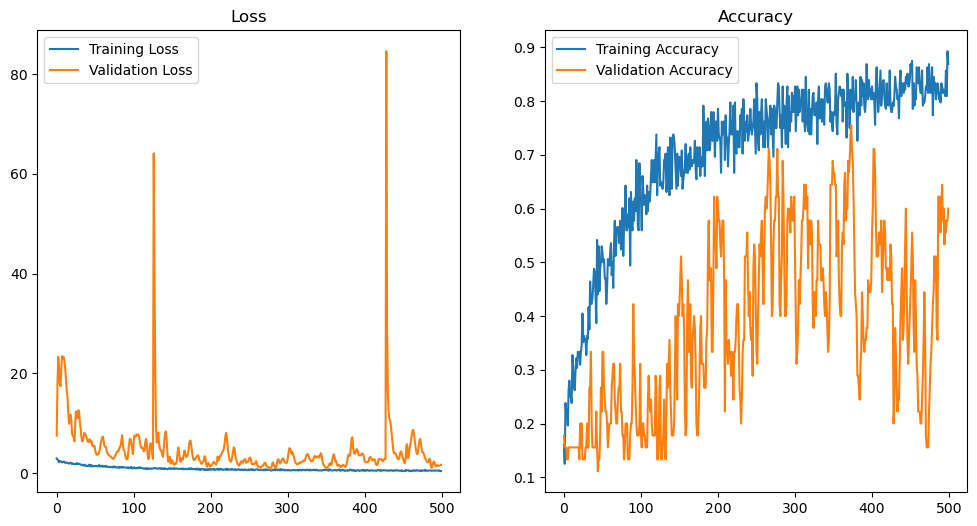

In [16]:

# Plotting training history
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [17]:
#FER2013VGG19---EXP1

In [18]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')

# Load the pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(48, 48, 3))

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')



Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.
CNN model has been created, you can proceed to train your data with this model.


In [19]:
# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500
225/225 [==============================] - 19s 76ms/step - loss: 2.3881 - accuracy: 0.2112 - val_loss: 1.7474 - val_accuracy: 0.3123
Epoch 2/500
225/225 [==============================] - 15s 68ms/step - loss: 2.1351 - accuracy: 0.2479 - val_loss: 1.7339 - val_accuracy: 0.3337
Epoch 3/500
225/225 [==============================] - 15s 68ms/step - loss: 2.0424 - accuracy: 0.2603 - val_loss: 1.7182 - val_accuracy: 0.3434
Epoch 4/500
225/225 [==============================] - 16s 69ms/step - loss: 1.9848 - accuracy: 0.2718 - val_loss: 1.6929 - val_accuracy: 0.3463
Epoch 5/500
225/225 [==============================] - 16s 71ms/step - loss: 1.9287 - accuracy: 0.2792 - val_loss: 1.6690 - val_accuracy: 0.3501
Epoch 6/500
225/225 [==============================] - 16s 70ms/step - loss: 1.8875 - accuracy: 0.2853 - val_loss: 1.6594 - val_accuracy: 0.3487
Epoch 7/500
225/225 [==============================] - 16s 70ms/step - loss: 1.8646 - accuracy: 0.2903 - val_loss: 1.6425 - val_ac

225/225 [==============================] - 15s 66ms/step - loss: 1.5221 - accuracy: 0.4062 - val_loss: 1.5101 - val_accuracy: 0.4076
Epoch 114/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5253 - accuracy: 0.4033 - val_loss: 1.5083 - val_accuracy: 0.4082
Epoch 115/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5253 - accuracy: 0.4034 - val_loss: 1.5042 - val_accuracy: 0.4142
Epoch 116/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5242 - accuracy: 0.4053 - val_loss: 1.5067 - val_accuracy: 0.4097
Epoch 117/500
225/225 [==============================] - 15s 67ms/step - loss: 1.5214 - accuracy: 0.4041 - val_loss: 1.5166 - val_accuracy: 0.4086
Epoch 118/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5220 - accuracy: 0.4063 - val_loss: 1.5058 - val_accuracy: 0.4110
Epoch 119/500
225/225 [==============================] - 15s 66ms/step - loss: 1.5223 - accuracy: 0.4048 - val_loss: 1.5089 - val_ac

Epoch 169/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4952 - accuracy: 0.4205 - val_loss: 1.4936 - val_accuracy: 0.4192
Epoch 170/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4936 - accuracy: 0.4203 - val_loss: 1.4887 - val_accuracy: 0.4227
Epoch 171/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4921 - accuracy: 0.4198 - val_loss: 1.5005 - val_accuracy: 0.4140
Epoch 172/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4910 - accuracy: 0.4226 - val_loss: 1.4963 - val_accuracy: 0.4207
Epoch 173/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4968 - accuracy: 0.4188 - val_loss: 1.4977 - val_accuracy: 0.4178
Epoch 174/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4945 - accuracy: 0.4178 - val_loss: 1.5005 - val_accuracy: 0.4178
Epoch 175/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4922 - accuracy: 0.4156 - val_loss: 1

Epoch 225/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4667 - accuracy: 0.4252 - val_loss: 1.4944 - val_accuracy: 0.4245
Epoch 226/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4684 - accuracy: 0.4276 - val_loss: 1.4936 - val_accuracy: 0.4255
Epoch 227/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4725 - accuracy: 0.4299 - val_loss: 1.4849 - val_accuracy: 0.4292
Epoch 228/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4735 - accuracy: 0.4247 - val_loss: 1.4906 - val_accuracy: 0.4269
Epoch 229/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4726 - accuracy: 0.4251 - val_loss: 1.4847 - val_accuracy: 0.4287
Epoch 230/500
225/225 [==============================] - 15s 66ms/step - loss: 1.4671 - accuracy: 0.4323 - val_loss: 1.4991 - val_accuracy: 0.4235
Epoch 231/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4765 - accuracy: 0.4255 - val_loss: 1

225/225 [==============================] - 25s 112ms/step - loss: 1.4473 - accuracy: 0.4419 - val_loss: 1.4751 - val_accuracy: 0.4391
Epoch 336/500
225/225 [==============================] - 25s 109ms/step - loss: 1.4369 - accuracy: 0.4423 - val_loss: 1.4873 - val_accuracy: 0.4274
Epoch 337/500
225/225 [==============================] - 25s 112ms/step - loss: 1.4414 - accuracy: 0.4367 - val_loss: 1.4854 - val_accuracy: 0.4295
Epoch 338/500
225/225 [==============================] - 26s 115ms/step - loss: 1.4352 - accuracy: 0.4420 - val_loss: 1.4853 - val_accuracy: 0.4355
Epoch 339/500
225/225 [==============================] - 25s 112ms/step - loss: 1.4417 - accuracy: 0.4432 - val_loss: 1.4879 - val_accuracy: 0.4326
Epoch 340/500
225/225 [==============================] - 24s 108ms/step - loss: 1.4390 - accuracy: 0.4408 - val_loss: 1.4814 - val_accuracy: 0.4358
Epoch 341/500
225/225 [==============================] - 23s 104ms/step - loss: 1.4365 - accuracy: 0.4451 - val_loss: 1.4848 -

Epoch 391/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4251 - accuracy: 0.4495 - val_loss: 1.4895 - val_accuracy: 0.4298
Epoch 392/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4285 - accuracy: 0.4458 - val_loss: 1.4835 - val_accuracy: 0.4329
Epoch 393/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4307 - accuracy: 0.4457 - val_loss: 1.4904 - val_accuracy: 0.4333
Epoch 394/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4305 - accuracy: 0.4463 - val_loss: 1.4895 - val_accuracy: 0.4310
Epoch 395/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4342 - accuracy: 0.4453 - val_loss: 1.4806 - val_accuracy: 0.4368
Epoch 396/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4348 - accuracy: 0.4444 - val_loss: 1.4964 - val_accuracy: 0.4277
Epoch 397/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4327 - accuracy: 0.4459 - val_loss: 1

Epoch 447/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4240 - accuracy: 0.4492 - val_loss: 1.4847 - val_accuracy: 0.4370
Epoch 448/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4275 - accuracy: 0.4479 - val_loss: 1.4832 - val_accuracy: 0.4369
Epoch 449/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4168 - accuracy: 0.4526 - val_loss: 1.4866 - val_accuracy: 0.4380
Epoch 450/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4224 - accuracy: 0.4519 - val_loss: 1.4874 - val_accuracy: 0.4356
Epoch 451/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4275 - accuracy: 0.4481 - val_loss: 1.4845 - val_accuracy: 0.4369
Epoch 452/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4186 - accuracy: 0.4546 - val_loss: 1.4818 - val_accuracy: 0.4411
Epoch 453/500
225/225 [==============================] - 15s 67ms/step - loss: 1.4238 - accuracy: 0.4497 - val_loss: 1

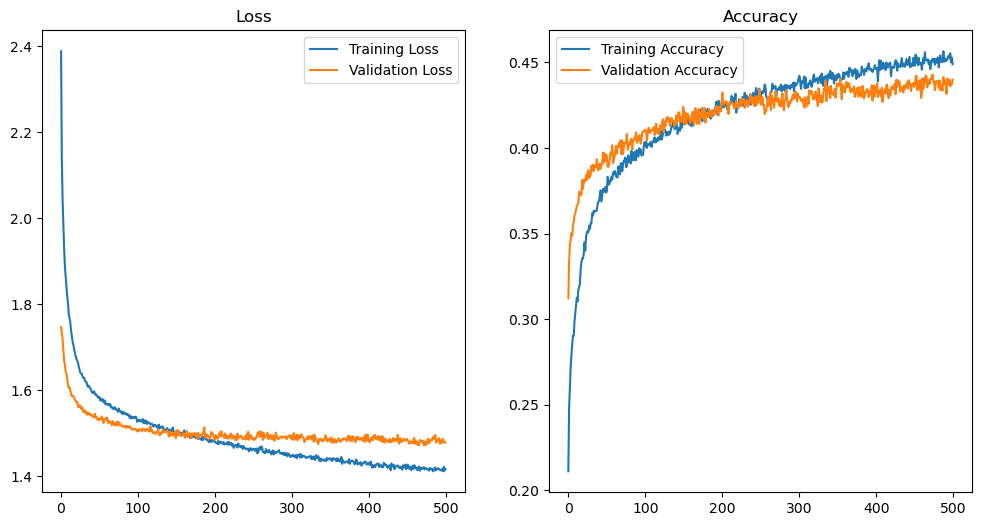

In [20]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()

In [1]:
#ferresnet---EXP1

In [2]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import (Dense, Flatten, BatchNormalization, 
                                     Dropout, Conv2D, MaxPooling2D)
from tensorflow.keras.applications import VGG19
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
import matplotlib.pyplot as plt
import numpy as np
import os


# Folder path for training images
folder_path = "images/train"  

# Image specifications
picture_size = 48  # Define picture size
batch_size = 128

# Data Generators with augmentation for training set
datagen_train = ImageDataGenerator(
    rescale=1./255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Normalization for validation set (no augmentation)
datagen_val = ImageDataGenerator(rescale=1./255)

# Create training and validation data sets
train_set = datagen_train.flow_from_directory(
    folder_path,
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

# Corrected test set creation
test_set = datagen_val.flow_from_directory(
    "images/test",  # Added a comma at the end of this line
    target_size=(picture_size, picture_size),  # Use picture_size variable
    color_mode="rgb",  # Ensure RGB input
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

print('Train and Validation sets have been created.')



from keras.applications.resnet import ResNet152
base_model = ResNet152(
    weights='imagenet',
    include_top = False,
    input_shape=(48,48,3)
)

# Show the model summary
#base_model.summary()

# Create a Sequential model
model = Sequential()

# Add base model
model.add(base_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
# Second fully connected layer  
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.30))
model.add(Dense(7, activation='softmax'))

# Set base model to not trainable
base_model.trainable = False

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])
print('CNN model has been created, you can proceed to train your data with this model.')


2024-10-19 12:54:43.355029: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-19 12:54:43.389615: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-19 12:54:43.954947: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.
Train and Validation sets have been created.


2024-10-19 12:54:45.165267: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-19 12:54:45.209354: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-10-19 12:54:45.209492: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

CNN model has been created, you can proceed to train your data with this model.


In [3]:

# Training the model
epochs = 500

history = model.fit(
    train_set,
    epochs=epochs,
    validation_data=test_set
)

# Print training history
print(history.history)



Epoch 1/500


2024-10-19 12:54:54.120942: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8905
2024-10-19 12:54:54.254027: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-10-19 12:54:54.696034: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x32aa3420 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-10-19 12:54:54.696051: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Laptop GPU, Compute Capability 8.6
2024-10-19 12:54:54.699201: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-19 12:54:54.780816: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime o

225/225 [==============================] - 26s 84ms/step - loss: 2.4018 - accuracy: 0.1809 - val_loss: 1.9013 - val_accuracy: 0.2281
Epoch 2/500
225/225 [==============================] - 16s 71ms/step - loss: 2.2230 - accuracy: 0.2066 - val_loss: 2.0499 - val_accuracy: 0.2212
Epoch 3/500
225/225 [==============================] - 16s 69ms/step - loss: 2.1315 - accuracy: 0.2238 - val_loss: 1.9018 - val_accuracy: 0.2169
Epoch 4/500
225/225 [==============================] - 16s 69ms/step - loss: 2.0816 - accuracy: 0.2252 - val_loss: 2.0718 - val_accuracy: 0.2526
Epoch 5/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0392 - accuracy: 0.2342 - val_loss: 1.8140 - val_accuracy: 0.2689
Epoch 6/500
225/225 [==============================] - 16s 70ms/step - loss: 2.0192 - accuracy: 0.2313 - val_loss: 1.7472 - val_accuracy: 0.2913
Epoch 7/500
225/225 [==============================] - 16s 69ms/step - loss: 1.9787 - accuracy: 0.2433 - val_loss: 1.7517 - val_accuracy: 0.30

225/225 [==============================] - 16s 70ms/step - loss: 1.6771 - accuracy: 0.3383 - val_loss: 1.6262 - val_accuracy: 0.3675
Epoch 58/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6795 - accuracy: 0.3346 - val_loss: 1.7376 - val_accuracy: 0.3275
Epoch 59/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6781 - accuracy: 0.3327 - val_loss: 1.6085 - val_accuracy: 0.3682
Epoch 60/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6791 - accuracy: 0.3351 - val_loss: 1.6363 - val_accuracy: 0.3739
Epoch 61/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6785 - accuracy: 0.3346 - val_loss: 1.8477 - val_accuracy: 0.2350
Epoch 62/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6700 - accuracy: 0.3406 - val_loss: 1.8295 - val_accuracy: 0.2835
Epoch 63/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6767 - accuracy: 0.3370 - val_loss: 1.8669 - val_accuracy

225/225 [==============================] - 16s 70ms/step - loss: 1.6427 - accuracy: 0.3502 - val_loss: 1.8286 - val_accuracy: 0.2934
Epoch 114/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6488 - accuracy: 0.3471 - val_loss: 1.6659 - val_accuracy: 0.3475
Epoch 115/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6484 - accuracy: 0.3462 - val_loss: 1.6527 - val_accuracy: 0.3448
Epoch 116/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6468 - accuracy: 0.3485 - val_loss: 1.6323 - val_accuracy: 0.3601
Epoch 117/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6456 - accuracy: 0.3502 - val_loss: 1.6175 - val_accuracy: 0.3670
Epoch 118/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6457 - accuracy: 0.3524 - val_loss: 1.7297 - val_accuracy: 0.3318
Epoch 119/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6459 - accuracy: 0.3508 - val_loss: 1.5776 - val_ac

Epoch 169/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6348 - accuracy: 0.3556 - val_loss: 1.6251 - val_accuracy: 0.3551
Epoch 170/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6323 - accuracy: 0.3556 - val_loss: 1.6067 - val_accuracy: 0.3654
Epoch 171/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6326 - accuracy: 0.3588 - val_loss: 1.7955 - val_accuracy: 0.2643
Epoch 172/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6289 - accuracy: 0.3573 - val_loss: 1.6092 - val_accuracy: 0.3780
Epoch 173/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6315 - accuracy: 0.3579 - val_loss: 1.5880 - val_accuracy: 0.3777
Epoch 174/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6263 - accuracy: 0.3610 - val_loss: 1.5771 - val_accuracy: 0.3750
Epoch 175/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6294 - accuracy: 0.3584 - val_loss: 1

Epoch 225/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6187 - accuracy: 0.3643 - val_loss: 1.6453 - val_accuracy: 0.3249
Epoch 226/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6203 - accuracy: 0.3611 - val_loss: 2.4369 - val_accuracy: 0.1467
Epoch 227/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6136 - accuracy: 0.3627 - val_loss: 1.6214 - val_accuracy: 0.3717
Epoch 228/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6222 - accuracy: 0.3606 - val_loss: 1.6673 - val_accuracy: 0.3494
Epoch 229/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6125 - accuracy: 0.3659 - val_loss: 1.5704 - val_accuracy: 0.3872
Epoch 230/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6170 - accuracy: 0.3654 - val_loss: 1.7693 - val_accuracy: 0.2992
Epoch 231/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6198 - accuracy: 0.3639 - val_loss: 1

Epoch 281/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6128 - accuracy: 0.3655 - val_loss: 1.7359 - val_accuracy: 0.3129
Epoch 282/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6142 - accuracy: 0.3647 - val_loss: 1.5958 - val_accuracy: 0.3718
Epoch 283/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6089 - accuracy: 0.3662 - val_loss: 1.6315 - val_accuracy: 0.3631
Epoch 284/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6119 - accuracy: 0.3691 - val_loss: 1.5951 - val_accuracy: 0.3672
Epoch 285/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6092 - accuracy: 0.3675 - val_loss: 1.5862 - val_accuracy: 0.3771
Epoch 286/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6130 - accuracy: 0.3651 - val_loss: 1.6096 - val_accuracy: 0.3651
Epoch 287/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6079 - accuracy: 0.3672 - val_loss: 1

Epoch 337/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6081 - accuracy: 0.3682 - val_loss: 1.5372 - val_accuracy: 0.3990
Epoch 338/500
225/225 [==============================] - 16s 69ms/step - loss: 1.5984 - accuracy: 0.3730 - val_loss: 1.7811 - val_accuracy: 0.2806
Epoch 339/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6045 - accuracy: 0.3684 - val_loss: 1.6883 - val_accuracy: 0.3193
Epoch 340/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6059 - accuracy: 0.3708 - val_loss: 1.6467 - val_accuracy: 0.3547
Epoch 341/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6044 - accuracy: 0.3707 - val_loss: 1.8381 - val_accuracy: 0.3076
Epoch 342/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6027 - accuracy: 0.3705 - val_loss: 1.7562 - val_accuracy: 0.3261
Epoch 343/500
225/225 [==============================] - 16s 70ms/step - loss: 1.6085 - accuracy: 0.3686 - val_loss: 1

Epoch 393/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6012 - accuracy: 0.3707 - val_loss: 1.5517 - val_accuracy: 0.3892
Epoch 394/500
225/225 [==============================] - 16s 69ms/step - loss: 1.5951 - accuracy: 0.3713 - val_loss: 1.5518 - val_accuracy: 0.3891
Epoch 395/500
225/225 [==============================] - 16s 69ms/step - loss: 1.5970 - accuracy: 0.3754 - val_loss: 1.5930 - val_accuracy: 0.3781
Epoch 396/500
225/225 [==============================] - 16s 69ms/step - loss: 1.5949 - accuracy: 0.3744 - val_loss: 1.5748 - val_accuracy: 0.3872
Epoch 397/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5985 - accuracy: 0.3743 - val_loss: 1.6334 - val_accuracy: 0.3639
Epoch 398/500
225/225 [==============================] - 16s 69ms/step - loss: 1.6004 - accuracy: 0.3729 - val_loss: 1.5757 - val_accuracy: 0.3806
Epoch 399/500
225/225 [==============================] - 16s 69ms/step - loss: 1.5969 - accuracy: 0.3738 - val_loss: 1

Epoch 449/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5989 - accuracy: 0.3708 - val_loss: 1.6454 - val_accuracy: 0.3633
Epoch 450/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5976 - accuracy: 0.3704 - val_loss: 1.5116 - val_accuracy: 0.4150
Epoch 451/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5918 - accuracy: 0.3736 - val_loss: 1.5493 - val_accuracy: 0.3941
Epoch 452/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5914 - accuracy: 0.3789 - val_loss: 1.5874 - val_accuracy: 0.3819
Epoch 453/500
225/225 [==============================] - 16s 69ms/step - loss: 1.5960 - accuracy: 0.3721 - val_loss: 1.7281 - val_accuracy: 0.3360
Epoch 454/500
225/225 [==============================] - 16s 69ms/step - loss: 1.5945 - accuracy: 0.3758 - val_loss: 1.5605 - val_accuracy: 0.3959
Epoch 455/500
225/225 [==============================] - 16s 70ms/step - loss: 1.5945 - accuracy: 0.3765 - val_loss: 1

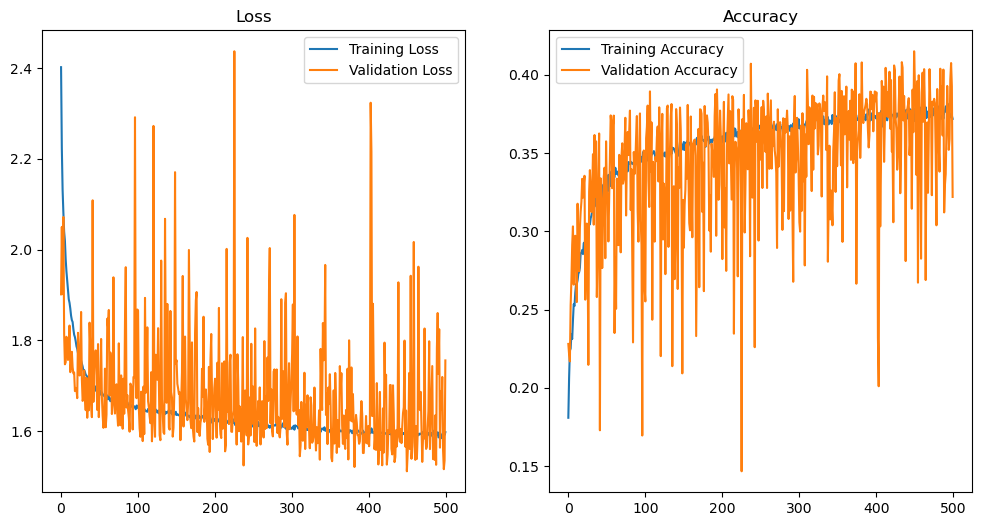

In [4]:
# Plotting training history
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.legend()

# Accuracy Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.legend()
plt.show()